In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df = pd.read_excel("realistic_focus_data.xlsx")

In [4]:
df['Hour'] = pd.to_datetime(df['Start Time'], format='%H:%M').dt.hour

In [5]:
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['Day'] = df['Day'].map(day_mapping)

In [6]:
df

,Session ID,Date,Day,Start Time,End Time,Task Type,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Focus Score (0-10),Productivity %,Hour
0,1,2024-03-01,4,09:40,11:30,Work,7,25,85,1.5,77.27,9
1,2,2024-03-01,4,08:58,10:37,Deep Work,6,0,99,7.0,100.00,8
2,3,2024-03-01,4,12:37,14:59,Study,0,26,116,4.8,81.69,12
3,4,2024-03-01,4,07:01,07:54,Deep Work,1,13,40,6.9,75.47,7
4,5,2024-03-02,5,06:01,07:31,Deep Work,6,14,76,4.2,84.44,6
...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,2024-03-29,4,07:09,09:21,Study,1,59,73,0.0,55.30,7
88,89,2024-03-30,5,11:49,14:03,Meeting,0,58,76,0.0,56.72,11
89,90,2024-03-30,5,06:40,08:38,Study,1,7,111,8.1,94.07,6
90,91,2024-03-30,5,14:09,15:41,Work,2,44,48,0.2,52.17,14


In [18]:
features = ['Hour', 'Day', 'App Switch Count', 'Distraction Duration (mins)', 'Total Focus Duration (mins)']
target = 'Focus Score (0-10)'

In [19]:
X = df[features]
y = df[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_hat = model.predict(X_test)

print(f"R2 score : {np.round(r2_score(y_test,y_hat),2)}%")
print(f"mean_absolute_error : {np.round(mean_absolute_error(y_test,y_hat),2)}%")
y_hat

R2 score : 0.92%
mean_absolute_error : 0.59%


array([5.342, 7.762, 0.482, 1.015, 1.491, 0.326, 0.019, 0.066, 4.493,
       4.668, 0.05 , 0.633, 7.999, 0.   , 8.446, 5.373, 0.253, 7.174,
       0.081])

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [42]:
app_switch = int(np.mean(df["App Switch Count"] , axis = 0)) 
app_switch

3

In [43]:
time_data = pd.DataFrame([(h, d) for h in range(24) for d in range(7)], columns=['Hour', 'Day'])
time_data['App Switch Count'] = app_switch  # Average value
time_data['Distraction Duration (mins)'] = 0
time_data['Total Focus Duration (mins)'] = 45


focus_predictions = model.predict(time_data)
time_data['Predicted Focus Score'] = focus_predictions

In [44]:
time_data

,Hour,Day,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Predicted Focus Score
0,0,0,3,0,45,8.143
1,0,1,3,0,45,8.143
2,0,2,3,0,45,8.084
3,0,3,3,0,45,8.060
4,0,4,3,0,45,8.042
...,...,...,...,...,...,...
163,23,2,3,0,45,8.194
164,23,3,3,0,45,8.170
165,23,4,3,0,45,8.158
166,23,5,3,0,45,8.161


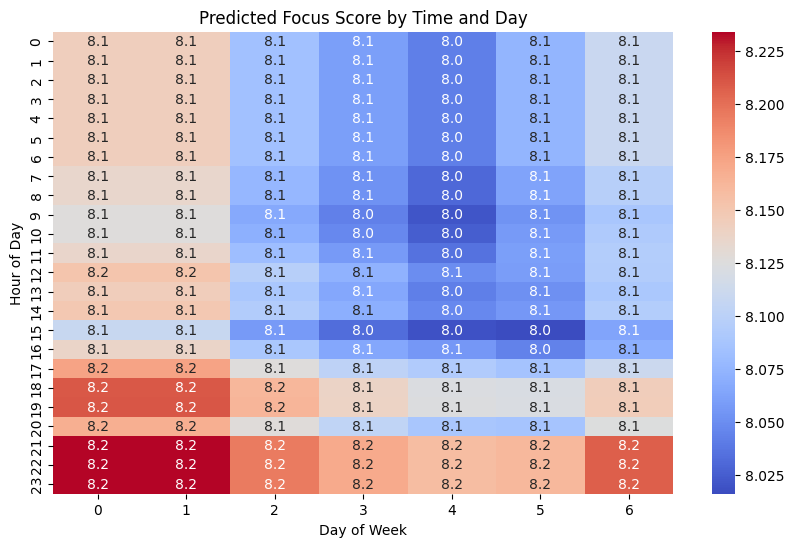

In [45]:
heatmap_data = time_data.pivot_table(values='Predicted Focus Score', index='Hour', columns='Day', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title("Predicted Focus Score by Time and Day")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()


In [32]:
max(df["Focus Score (0-10)"])

9.6

In [39]:
df.sort_values(by="Focus Score (0-10)" , ascending=False).head(10)

,Session ID,Date,Day,Start Time,End Time,Task Type,App Switch Count,Distraction Duration (mins),Total Focus Duration (mins),Focus Score (0-10),Productivity %,Hour
6,7,2024-03-02,5,17:20,18:10,Personal Project,0,2,48,9.6,96.00,17
38,39,2024-03-13,2,11:56,12:42,Personal Project,0,2,44,9.6,95.65,11
52,53,2024-03-18,0,17:13,18:33,Personal Project,0,2,78,9.6,97.50,17
14,15,2024-03-04,0,22:48,23:37,Meeting,1,0,49,9.5,100.00,22
31,32,2024-03-10,6,15:47,18:08,Study,1,1,140,9.3,99.29,15
70,71,2024-03-25,0,21:30,22:17,Study,0,6,41,8.8,87.23,21
12,13,2024-03-04,0,15:24,16:23,Meeting,1,5,54,8.5,91.53,15
21,22,2024-03-08,4,22:55,00:55,Meeting,1,5,115,8.5,95.83,22
27,28,2024-03-09,5,13:57,16:17,Personal Project,0,8,132,8.4,94.29,13
45,46,2024-03-14,3,16:57,18:24,Personal Project,1,6,81,8.3,93.10,16
